In [1]:
# Importing required libraries
import pandas as pd                  # For data manipulation and analysis
from pandas_datareader import data as pdr  # For retrieving financial data
import yfinance as yf                # Yahoo Finance library for data retrieval
yf.pdr_override()                    # Override pandas datareader with yfinance
from datetime import datetime        # For working with dates and times
import numpy as np                   # For numerical operations
import matplotlib.pyplot as plt      # For data visualization
import seaborn as sns                # For enhanced data visualization
sns.set()                            # Set the default seaborn style

In [2]:
def Load_Data(symbols, start_date, end_date):
    # Create an empty dictionary to store the data
    data = {}
    # Iterate over the symbols and load the data
    for symbol in symbols:
        try:
            # Use pandas_datareader to load the data from Yahoo Finance
            df = pdr.get_data_yahoo(symbol, start_date, end_date,interval='1d')
            # Store the data in the dictionary
            data[symbol] = df
            print(f"Data loaded successfully for symbol: {symbol}")
        except Exception as e:
            print(f"Error loading data for symbol: {symbol}")
            print(str(e))
    return data

In [34]:
# List of symbols for the financial datasets
symbols = ['AAPL', 'GOOGL', 'AMZN']
# Set the start and end dates for the data
start_date = datetime(2010,1,1)
end_date = datetime(2022,12,31)
Stock_data = Load_Data(symbols, start_date, end_date)

[*********************100%***********************]  1 of 1 completed
Data loaded successfully for symbol: AAPL
[*********************100%***********************]  1 of 1 completed
Data loaded successfully for symbol: GOOGL
[*********************100%***********************]  1 of 1 completed
Data loaded successfully for symbol: AMZN


In [35]:
def Merge_Closing_Price(data):
    # Extract the 'Adj Close' column from each DataFrame
    df_stocks = [df['Adj Close'] for df in data.values()]
    # Merge the DataFrames based on the index
    merged_data = pd.concat(df_stocks, axis=1)
    # Rename the columns using the symbols
    merged_data.columns = data.keys()
    return merged_data
df_stocks = Merge_Closing_Price(Stock_data)

In [36]:
returns = df_stocks.pct_change()

In [37]:
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()


In [39]:
# Set an array holding portfolio weights of each stock
weights = np.asarray([0.5, 0.2, 0.3])
# Calculate annualized portfolio return
portfolio_return = round(np.sum(mean_daily_returns * weights) * 252, 2)
# Calculate annualized portfolio volatility
portfolio_std_dev = round(np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252), 2)
# Print the portfolio expected annualized return and volatility
print(f"Portfolio expected annualized return: {portfolio_return}%")
print(f"Portfolio volatility: {portfolio_std_dev}%")

Portfolio expected annualized return: 0.24%
Portfolio volatility: 0.25%


In [48]:
# Set the number of runs of random portfolio weights
num_portfolios = 10000

# Set up an array to hold results
results = np.zeros((3, num_portfolios))

for i in range(num_portfolios):
    # Select random weights for portfolio holdings
    weights = np.random.random(3)
    # Rebalance weights to sum to 1
    weights /= np.sum(weights)

    # Calculate portfolio return and volatility
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)

    # Store results in results array
    results[0, i] = portfolio_return
    results[1, i] = portfolio_std_dev
    # Store Sharpe Ratio (return / volatility) - risk-free rate element excluded for simplicity
    results[2, i] = results[0, i] / results[1, i]

# Convert results array to a Pandas DataFrame
results_frame = pd.DataFrame(results.T, columns=['Return', 'Volatility', 'Sharpe'])


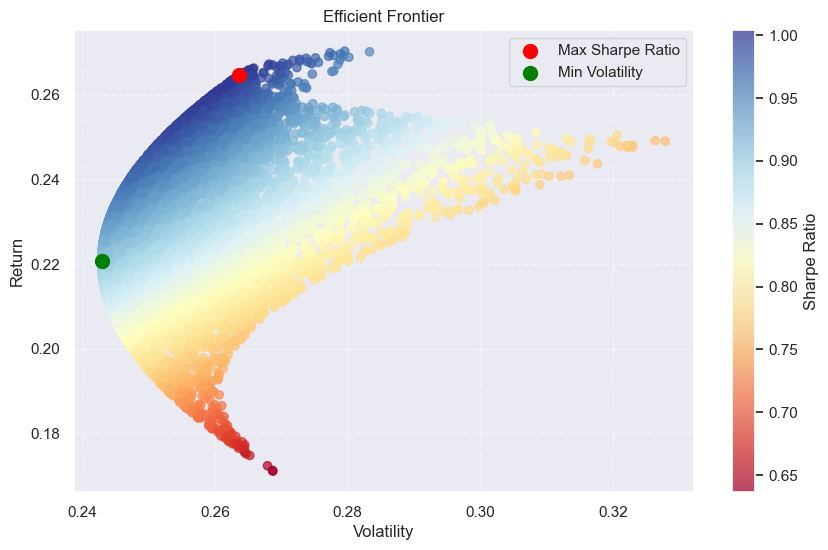

In [49]:
# Create a 2D line plot with color gradient based on Sharpe Ratio
plt.figure(figsize=(10, 6))
plt.scatter(results_frame['Volatility'], results_frame['Return'], c=results_frame['Sharpe'], cmap='RdYlBu', alpha=0.7)
plt.colorbar(label='Sharpe Ratio')


# Highlight the portfolio with the maximum Sharpe Ratio
max_sharpe_idx = results_frame['Sharpe'].idxmax()
plt.scatter(results_frame['Volatility'][max_sharpe_idx], results_frame['Return'][max_sharpe_idx], color='red', marker='o', s=100, label='Max Sharpe Ratio')

# Highlight the portfolio with the minimum volatility
min_volatility_idx = results_frame['Volatility'].idxmin()
plt.scatter(results_frame['Volatility'][min_volatility_idx], results_frame['Return'][min_volatility_idx], color='green', marker='o', s=100, label='Min Volatility')

# Set plot labels, legend, and title
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.title('Efficient Frontier')

# Set plot aesthetics
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

# Show the plot
plt.show()
